#### **Análise das emissões de gases do efeito estufa no Brasil**

Este notebook realiza uma análise exploratória das emissões de gases de efeito estufa (GEE) no Brasil, utilizando bibliotecas do ecossistema Python para manipulação e visualização de dados. O objetivo é compreender os padrões de emissão ao longo dos anos e identificar as principais fontes de poluição atmosférica nos estados brasileiros.

##### **Objetivos**

- Carregar e organizar os dados de emissão de gases do efeito estufa no Brasil;
- Filtrar os dados relevantes para a análise, excluindo informações não contempladas no inventário nacional;
- Identificar padrões e tendências nas emissões de GEE por estado e setor econômico;
- Criar visualizações para destacar as principais fontes de emissão ao longo do tempo.

##### **Conjunto de dados**

Os dados utilizados são provenientes do **Sistema de Estimativas de Emissões de Gases de Efeito Estufa (SEEG)** e incluem informações sobre emissões em diferentes estados do Brasil. As categorias consideradas incluem **energia**, **agropecuária**, **mudança de uso da terra e floresta**, **processos industriais** e **resíduos**.

Observação: Os dados sobre "Mudança de Uso da Terra e Floresta" estão disponíveis apenas a partir de **1990**.

##### **Bibliotecas utilizadas**

**Pandas** – Manipulação e análise de dados estruturados.  
**Matplotlib** e **Plotly** – Geração de gráficos para análise visual dos dados.  
**Python** – Lógica e execução da análise.  

##### **Principais resultados**

A análise permite observar que os estados com maior emissão de gases de efeito estufa são aqueles com forte presença da agropecuária e mudança de uso da terra. Além disso, setores como transporte e energia também têm impacto significativo. Os gráficos gerados ajudarão a visualizar a evolução das emissões ao longo do tempo e identificar possíveis mudanças no padrão de emissão dos estados brasileiros.



In [310]:
# importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [182]:
# importando os dados
emissoes_gases = pd.read_excel('1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name = 'GEE Estados')

In [184]:
# exibindo os dados
emissoes_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,8.976000e+02,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,1.300000e+02,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1.380576e+03,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,4.314300e+02,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,4.030000e+04,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103307,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GTP-AR6,BR,NaN,...,2731963.400,1091033.900,853275.300,1003731.400,1615000.600,1552258.800,216231.900,2805297.300,9.659261e+06,0.000
103308,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR2,BR,NaN,...,2921341.000,1144504.000,896685.000,1074717.000,1763431.000,1706030.000,252599.000,3105007.000,1.053571e+07,0.000
103309,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR4,BR,NaN,...,2950049.000,1151848.000,902209.000,1084073.000,1782863.000,1726958.000,257507.000,3147567.000,1.067568e+07,0.000
103310,Mudança de Uso da Terra e Floresta,Queimadas Não Associadas a Desmatamento,Pantanal,NaN,NaN,NaN,Emissão NCI,CO2e (t) GWP-AR5,BR,NaN,...,2957780.000,1152868.000,902368.000,1084826.000,1784237.000,1729598.000,258068.000,3155415.000,1.072232e+07,0.000


In [188]:
# verificando a estrutura do DataFrame
emissoes_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

Estamos interessados somente na emissão de gases gerados pelos estados que estejam no inventário nacional, portanto vamos identificar os tipos de dados únicos da coluna *Emissão / Remoção / Bunker*.

---
- Remoções são dados referentes à retirada dos gases estufa, que é o contrário da emissão;
- NCI são dados não contemplados no inventário nacional;
- Bunkers são emissões de transporte marítimo e aéreo internacional, portanto não são emissões diretas dos estados.

Informação disponível no site do SEEG: https://seeg.eco.br/entenda-as-estimativas

---

In [191]:
# verificando os valores únicos da coluna
emissoes_gases['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

In [193]:
# exibindo um df com filtro aplicado para valores de remoção de gases
emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [195]:
# exibindo um df com filtro aplicado para valores de remoção de gases somente para colunas de anos (1970-2021)
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


In [197]:
# verificando se não há valores positivos na remoção
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021].max()

1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

In [199]:
# verificando se não há estados vinculados a emissões internacionais
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'] == 'Bunker', 'Estado'].unique()

array([nan], dtype=object)

In [201]:
# mantendo no df apenas os valores de interesse
emissoes_gases = emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'] == 'Emissão']
emissoes_gases.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


In [203]:
# removendo a coluna do df
emissoes_gases = emissoes_gases.drop(columns = 'Emissão / Remoção / Bunker')
emissoes_gases

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,...,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600000,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,...,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,...,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576000,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,...,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430000,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,...,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000000,40300.000,40300.000,40300.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,...,436935.000000,500067.000000,440030.000000,365272.000000,438422.000000,391113.000000,411738.000000,437039.000,871393.000,1004191.000
103242,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,...,126806.000000,127558.000000,193758.000000,164585.000000,234509.000000,190412.000000,162919.000000,186091.000,368149.000,443120.000
103243,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,...,439524.000000,502908.000000,442493.000000,367116.000000,440798.000000,393101.000000,413749.000000,439526.000,876637.000,1009968.000
103244,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,...,108.441090,109.811199,166.680103,141.442361,201.556097,162.932751,137.219684,158.000,314.000,479.000


In [205]:
# criando uma lista com as colunas de informações
colunas_info = list(emissoes_gases.loc[:, 'Nível 1 - Setor':'Produto'].columns)
colunas_info

['Nível 1 - Setor',
 'Nível 2',
 'Nível 3',
 'Nível 4',
 'Nível 5',
 'Nível 6',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

In [207]:
# criando uma lista com as colunas de emissões
colunas_emissao = list(emissoes_gases.loc[:, 1970:2021].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [209]:
# alterando o formato do df
emissoes_por_ano = emissoes_gases.melt(id_vars = colunas_info,
                                       value_vars = colunas_emissao,
                                       var_name = 'Ano',
                                       value_name = 'Emissão')
emissoes_por_ano

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4926891,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
4926892,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
4926893,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
4926894,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [210]:
# criando um novo df com a emissão total de cada gás
emissao_por_gas = emissoes_por_ano.groupby('Gás')[['Emissão']].sum().sort_values('Emissão', ascending = False)
emissao_por_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


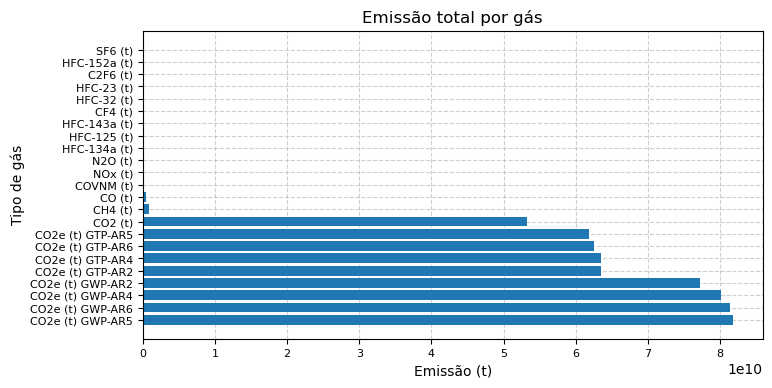

In [211]:
# visualizando os dados agrupados
plt.figure(figsize = (8, 4))
plt.barh(emissao_por_gas.index, emissao_por_gas['Emissão'])
plt.title('Emissão total por gás', fontsize = 12)
plt.xlabel('Emissão (t)', fontsize = 10)
plt.xticks(fontsize = 8)
plt.ylabel('Tipo de gás', fontsize = 10)
plt.yticks(fontsize = 8)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.gca().set_axisbelow(True)
plt.show()

In [212]:
# filtrando os primeiros registros (gases CO2)
emissao_por_gas.iloc[0:9]

,Emissão
Gás,
CO2e (t) GWP-AR5,8.181375e+10
CO2e (t) GWP-AR6,8.132316e+10
CO2e (t) GWP-AR4,8.015921e+10
CO2e (t) GWP-AR2,7.720596e+10
CO2e (t) GTP-AR2,6.344612e+10
CO2e (t) GTP-AR4,6.344612e+10
CO2e (t) GTP-AR6,6.247859e+10
CO2e (t) GTP-AR5,6.182200e+10
CO2 (t),5.324636e+10


In [214]:
# calculando a porcentagem de emissão de CO2
porcentagem_co2 = float((emissao_por_gas.iloc[0:9].sum()/emissao_por_gas.sum()).iloc[0]) * 100

print(f'A emissão de CO2 corresponde a {porcentagem_co2:.2f}% de emissão total de gases estufa no Brasil de 1970 a 2021.')

A emissão de CO2 corresponde a 99.74% de emissão total de gases estufa no Brasil de 1970 a 2021.


In [216]:
# criando um df multi-index de emissão de gases por setor
gas_por_setor = emissoes_por_ano.groupby(['Gás', 'Nível 1 - Setor'])[['Emissão']].sum()
gas_por_setor

Emissão
Gás      Nível 1 - Setor                                 
C2F6 (t) Processos Industriais               5.765018e+02
CF4 (t)  Processos Industriais               7.135481e+03
CH4 (t)  Agropecuária                        5.928481e+08
         Energia                             3.429034e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.764127e+05
NOx (t)  Agropecuária                        2.602719e+06
         Energia                             9.361215e+07
         Processos Industriais               3.546360e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

In [217]:
# filtrando os dados de emissão para um tipo de gás
gas_por_setor.xs('CO2 (t)', level = 0).sort_values('Emissão', ascending = False)

,Emissão
Nível 1 - Setor,
Mudança de Uso da Terra e Floresta,3.733930e+10
Energia,1.261352e+10
Processos Industriais,2.729603e+09
Agropecuária,5.411750e+08
Resíduos,2.276264e+07


In [220]:
# verificando o setor com mais emissão e seus valores para cada tipo de gás
gas_por_setor.groupby(level = 0).idxmax()
valores_max = gas_por_setor.groupby(level = 0).max().values
tabela_sumarizada = gas_por_setor.groupby(level = 0).idxmax()
tabela_sumarizada.insert(1, 'Quantidade de emissão', valores_max)
tabela_sumarizada

,Emissão,Quantidade de emissão
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",5.765018e+02
CF4 (t),"(CF4 (t), Processos Industriais)",7.135481e+03
CH4 (t),"(CH4 (t), Agropecuária)",5.928481e+08
CO (t),"(CO (t), Energia)",3.959769e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",3.733930e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",3.850044e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",3.831675e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",3.843359e+10


In [222]:
# invertendo a ordem dos níveis do df
gas_por_setor.swaplevel(0, 1)

Emissão
Nível 1 - Setor                    Gás                   
Processos Industriais              C2F6 (t)  5.765018e+02
                                   CF4 (t)   7.135481e+03
Agropecuária                       CH4 (t)   5.928481e+08
Energia                            CH4 (t)   3.429034e+07
Mudança de Uso da Terra e Floresta CH4 (t)   8.662166e+07
...                                                   ...
Resíduos                           N2O (t)   2.764127e+05
Agropecuária                       NOx (t)   2.602719e+06
Energia                            NOx (t)   9.361215e+07
Processos Industriais              NOx (t)   3.546360e+06
                                   SF6 (t)   4.705800e+02

[72 rows x 1 columns]

In [225]:
# verificando o gás mais emitido por setor
gas_por_setor.swaplevel(0, 1).groupby(level = 0).idxmax()

,Emissão
Nível 1 - Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


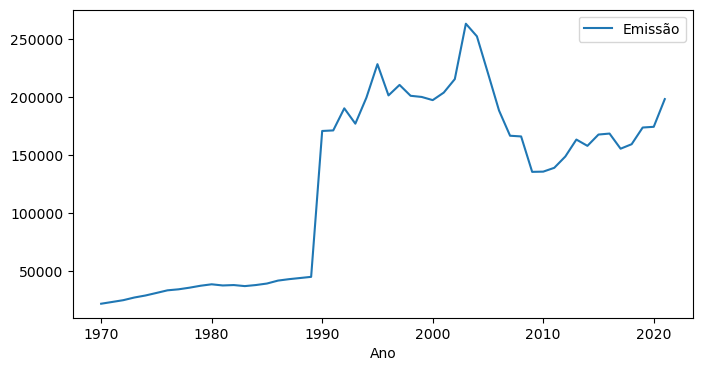

In [229]:
# visualizando a média anual total das emissões
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().plot(figsize = (8, 4));

Obs.: Os dados fornecidos pelo SRG apresentam informações sobre emissão por "mudança de uso da terra e floresta" somente a partir de 1990.

In [232]:
# criando um df com a emissão média anual de emissão de cada gás
media_emissao_anual = emissoes_por_ano.groupby(['Ano', 'Gás'])[['Emissão']].mean().reset_index()
media_emissao_anual = media_emissao_anual.pivot_table(index = 'Ano', columns = 'Gás', values = 'Emissão')
media_emissao_anual

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Ano,,,,,,,,,,,,,,,,,,,,,
1970,0.232610,3.557421,1471.024024,2155.556658,19244.913199,20821.379814,20821.379814,19162.726020,19775.283385,35396.183865,...,742.074863,0.000000,0.000000,0.000000,0.0,0.00,0.00,31.632709,154.072797,0.000
1971,0.334611,5.117360,1525.506914,2259.625805,21598.587743,22466.288595,22466.288595,20748.481445,21386.175802,37570.982886,...,730.119047,0.000000,0.000000,0.000000,0.0,0.00,0.00,32.609237,170.550178,0.000
1972,0.404684,6.189025,1584.719568,2418.944795,23664.445521,24100.305265,24100.305265,22303.224240,22966.797327,39800.768350,...,774.278817,0.000000,0.000000,0.000000,0.0,0.00,0.00,34.311864,188.856161,0.000
1973,0.463147,7.083136,1642.612439,2596.053853,27726.668829,26683.827206,26683.827206,24827.077028,25516.409611,42947.755490,...,796.866394,0.000000,0.000000,0.000000,0.0,0.00,0.00,35.278689,217.320480,0.000
1974,0.471026,7.203619,1704.614365,2681.450599,30155.918952,28539.318732,28539.318732,26600.481407,27321.124852,45431.240064,...,1024.694923,0.000000,0.000000,0.000000,0.0,0.00,0.00,37.098183,247.521415,0.000
1975,0.502952,7.691893,1854.360821,2730.894830,32292.965771,30593.767465,30593.767465,28507.669059,29285.642221,48944.729581,...,1065.682750,0.000000,0.000000,0.000000,0.0,0.00,0.00,39.451008,262.716346,0.000
1976,0.577172,8.826970,1932.641716,2702.494362,35640.344723,33066.878007,33066.878007,30879.481709,31693.226162,52203.028009,...,1091.778909,0.000000,0.000000,0.000000,0.0,0.00,0.00,41.583225,287.013048,0.000
1977,0.692855,10.596169,1931.897645,2675.992077,37313.909077,34182.312333,34182.312333,31967.243034,32784.131397,53333.605735,...,1147.712448,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.571086,292.405821,0.000
1978,0.749660,11.464915,1921.281930,2755.891877,40669.820049,35969.633601,35969.633601,33762.778999,34580.720998,55015.291182,...,1289.853564,0.000000,0.000000,0.000000,0.0,0.00,0.00,42.426649,322.982906,0.000


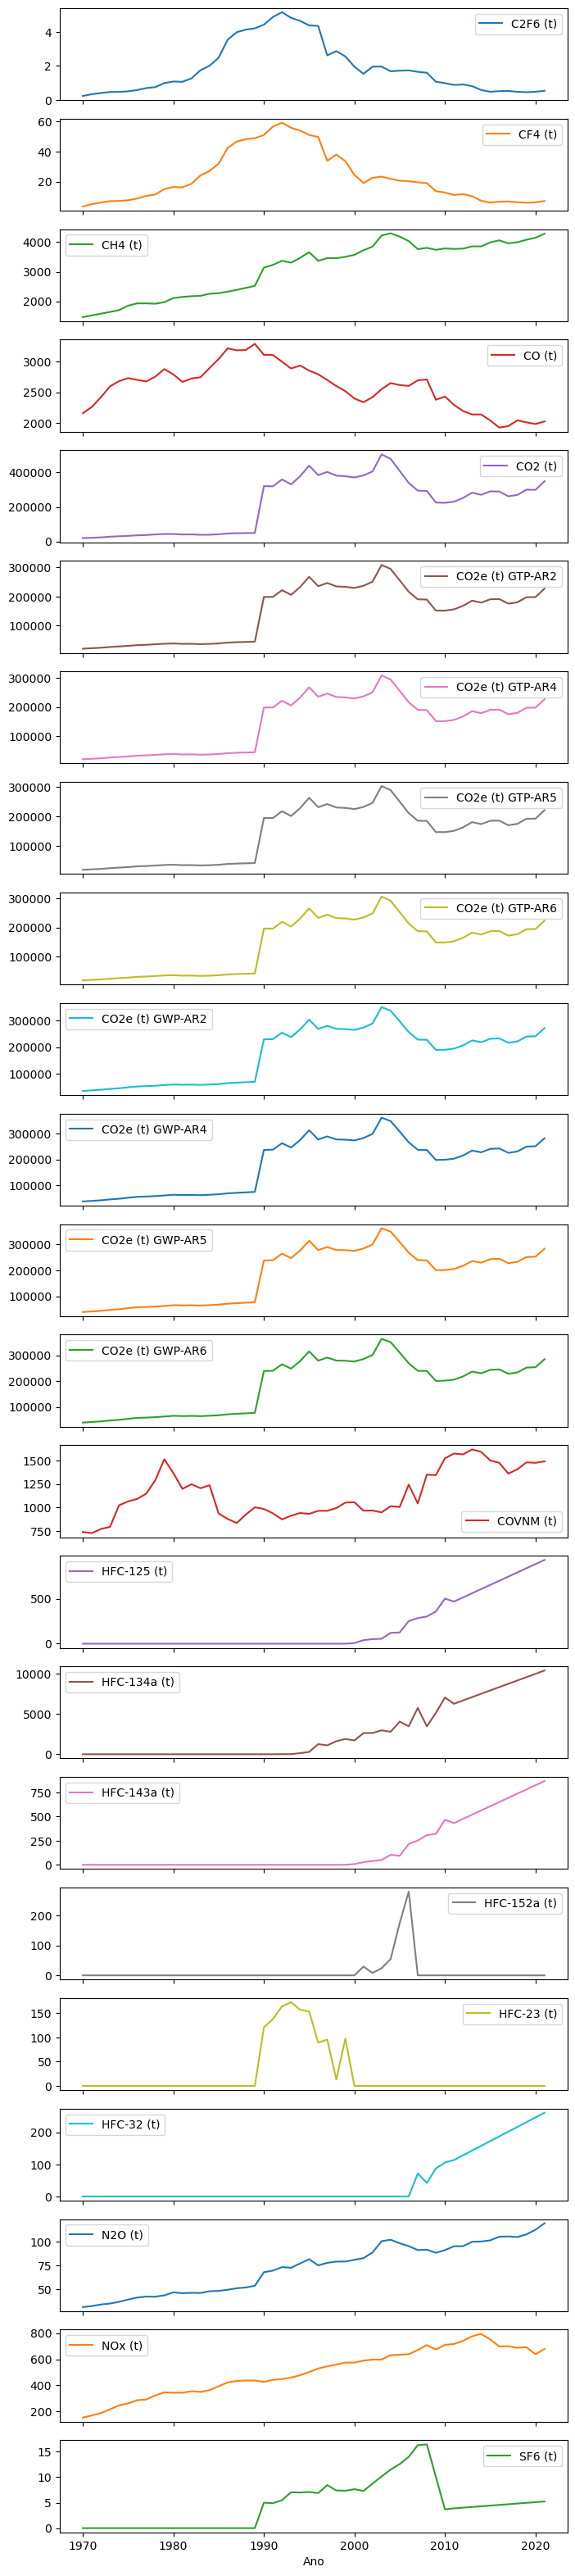

In [233]:
# visualizando a média anual de emissão de cada gás
media_emissao_anual.plot(subplots = True, figsize = (8, 40));

In [235]:
# importando os dados da população
populacao_estados = pd.read_excel('POP2022_Municipios.xls', header = 1, skipfooter = 34)

In [238]:
# exibindo os dados da população
populacao_estados

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237
...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046
5566,GO,52,22054,Vicentinópolis,8776
5567,GO,52,22203,Vila Boa,3686
5568,GO,52,22302,Vila Propício,5646


In [268]:
# verificando os dados da coluna "população" que necessitam de tratamento
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na = False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [266]:
# tratando os dados coluna de "população"
populacao_estados = populacao_estados.assign(populacao_sem_parenteses = populacao_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex = True),
                                             populacao = lambda x: x.loc[:, 'populacao_sem_parenteses'].replace('\.', '', regex = True))
populacao_estados = populacao_estados.astype({'populacao': 'int64'})
populacao_estados

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
0,RO,11,15,Alta Floresta D'Oeste,21558,21558,21558
1,RO,11,23,Ariquemes,100896,100896,100896
2,RO,11,31,Cabixi,5107,5107,5107
3,RO,11,49,Cacoal,92202,92202,92202
4,RO,11,56,Cerejeiras,15237,15237,15237
...,...,...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046,14046,14046
5566,GO,52,22054,Vicentinópolis,8776,8776,8776
5567,GO,52,22203,Vila Boa,3686,3686,3686
5568,GO,52,22302,Vila Propício,5646,5646,5646


In [282]:
# agrupando os dados da coluna "população" por estado no df
populacao_estados = populacao_estados.groupby('UF')[['populacao']].sum().reset_index()
populacao_estados

,UF,populacao
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


In [284]:
# criando um df para o total de emissão por estado no ano de 2021
emissao_estados = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Estado')[['Emissão']].sum().reset_index()
emissao_estados

,Estado,Emissão
0,AC,3.505471e+08
1,AL,6.261279e+07
2,AM,1.189649e+09
3,AP,3.568410e+07
4,BA,5.932251e+08
5,CE,2.034731e+08
6,DF,5.668738e+07
7,ES,2.697547e+08
8,GO,6.008081e+08
9,MA,9.476324e+08


In [288]:
# unindo os dfs de emissão e população por estado
dados_agrupados = pd.merge(emissao_estados, populacao_estados, left_on = 'Estado', right_on = 'UF')
dados_agrupados

,Estado,Emissão,UF,populacao
0,AC,3.505471e+08,AC,829780
1,AL,6.261279e+07,AL,3125254
2,AM,1.189649e+09,AM,3952262
3,AP,3.568410e+07,AP,774268
4,BA,5.932251e+08,BA,14659023
5,CE,2.034731e+08,CE,8936431
6,DF,5.668738e+07,DF,2923369
7,ES,2.697547e+08,ES,3975100
8,GO,6.008081e+08,GO,6950976
9,MA,9.476324e+08,MA,6800605


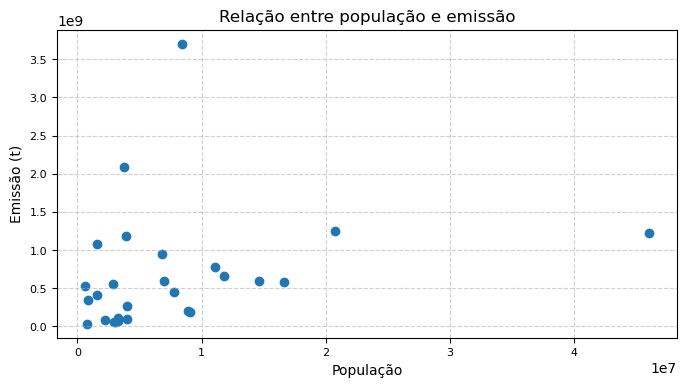

In [308]:
# visualizando a relação entre emissão e população
plt.figure(figsize = (8, 4))
plt.scatter(dados_agrupados['populacao'], dados_agrupados['Emissão'])
plt.title('Relação entre população e emissão', fontsize = 12)
plt.xlabel('População', fontsize = 10)
plt.xticks(fontsize = 8)
plt.ylabel('Emissão (t)', fontsize = 10)
plt.yticks(fontsize = 8)
plt.grid(True, linestyle = '--', alpha = 0.6)
plt.show()

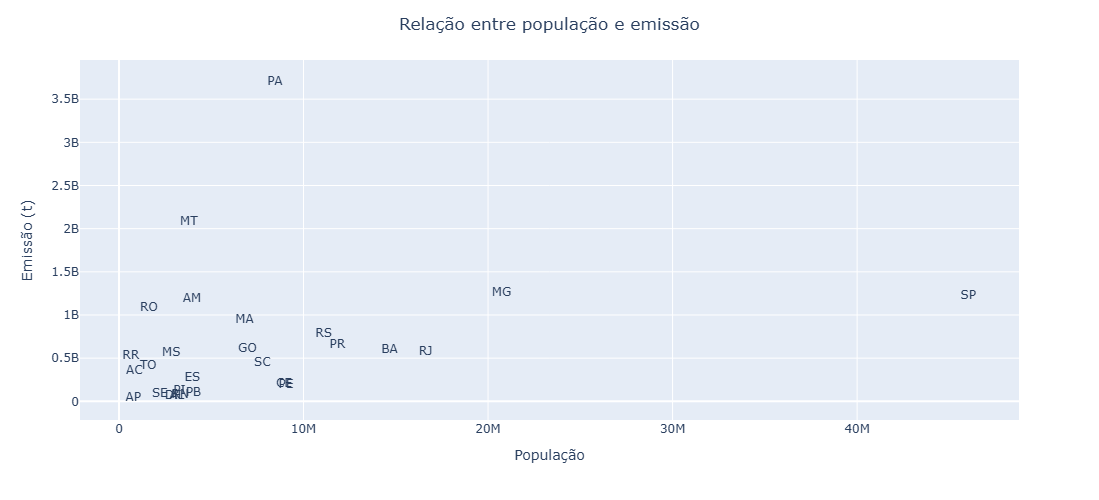

In [368]:
# visualizando a relação entre emissão e população de forma interativa
fig = px.scatter(data_frame = dados_agrupados, x = 'populacao', y = 'Emissão', 
                 text = 'Estado', opacity = 0)

fig.update_layout(title = {'text': 'Relação entre população e emissão', 'x': 0.5},
                  xaxis_title = 'População',
                  yaxis_title = 'Emissão (t)',
                  width = 1100, height = 500)
fig.show()

In [360]:
# adicionando dados de emissão per capita ao df
dados_agrupados = dados_agrupados.assign(emissao_per_capita = dados_agrupados['Emissão']/dados_agrupados['populacao']).sort_values('emissao_per_capita', ascending = False)
dados_agrupados                        

,Estado,Emissão,UF,populacao,emissao_per_capita
21,RR,5.282071e+08,RR,634805,832.077694
20,RO,1.083515e+09,RO,1616379,670.334662
12,MT,2.081610e+09,MT,3784239,550.073647
13,PA,3.701684e+09,PA,8442962,438.434230
0,AC,3.505471e+08,AC,829780,422.457928
2,AM,1.189649e+09,AM,3952262,301.004463
26,TO,4.082159e+08,TO,1584306,257.662300
11,MS,5.551278e+08,MS,2833742,195.899220
9,MA,9.476324e+08,MA,6800605,139.345312
8,GO,6.008081e+08,GO,6950976,86.435075


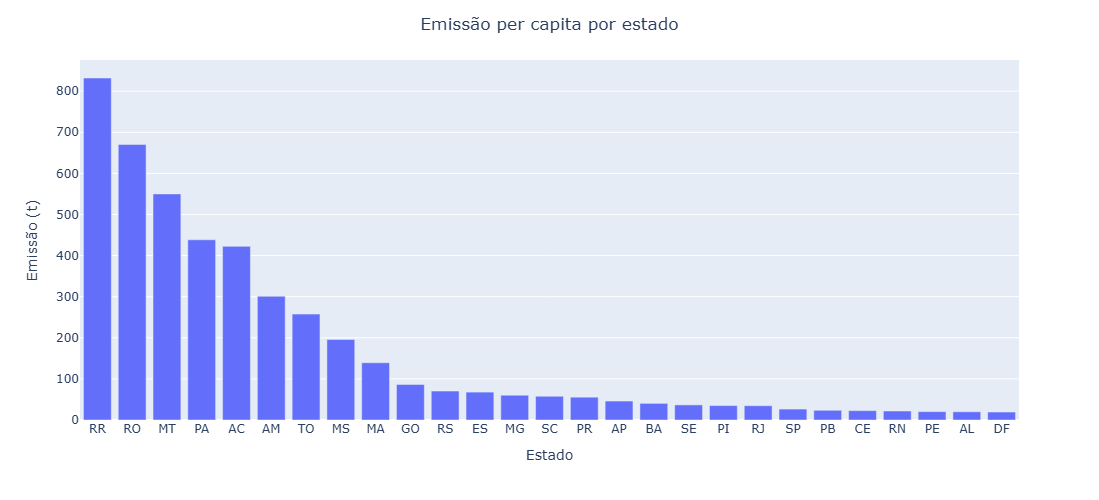

In [364]:
# visualizando a relação entre emissão e população de forma interativa
fig = px.bar(data_frame = dados_agrupados, x = 'Estado', y = 'emissao_per_capita')

fig.update_layout(title = {'text': 'Emissão per capita por estado', 'x': 0.5},
                  xaxis_title = 'Estado',
                  yaxis_title = 'Emissão (t)',
                  width = 1100, height = 500)
fig.show()